In [1]:
import seaborn as sns
import pandas as pd
data=pd.read_csv("C://Users//POPO//Desktop//pgalpga2008.dat.txt",header=None,sep='  ')

C:\Users\POPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
data=data[[0,2,5]]
data.columns=["average_driving_distance","the_percentage_of_the_player_drives","golfer_sex"]
data.head()

,average_driving_distance,the_percentage_of_the_player_drives,golfer_sex
0,243.2,67.0,1
1,254.5,70.1,1
2,253.1,59.3,1
3,228.1,70.4,1
4,240.8,69.5,1


Text(0, 0.5, "the percentage of the player's drives")

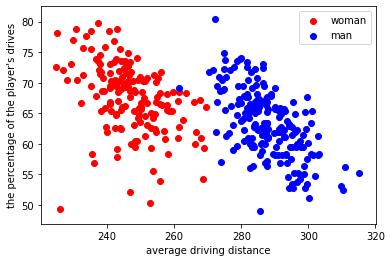

In [3]:
import matplotlib.pyplot as plt
plt.scatter(data[data["golfer_sex"]==1]["average_driving_distance"],data[data["golfer_sex"]==1]["the_percentage_of_the_player_drives"],label="woman",color="r")
plt.scatter(data[data["golfer_sex"]==2]["average_driving_distance"],data[data["golfer_sex"]==2]["the_percentage_of_the_player_drives"],label="man",color='b')
plt.legend()
plt.xlabel("average driving distance")
plt.ylabel("the percentage of the player's drives")

In [4]:
#import seaborn as sns
#sns.scatterplot("average driving distance","the percentage of the player's drives",hue="golfer sex",data=data)

In [5]:
import statsmodels.api as sm
new=data[data["golfer_sex"]==1]
x=sm.add_constant(new["average_driving_distance"])
model = sm.OLS(new["the_percentage_of_the_player_drives"],x )
results = model.fit()
results.summary()

C:\Users\POPO\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     the_percentage_of_the_player_drives   R-squared:                       0.178
Model:                                             OLS   Adj. R-squared:                  0.173
Method:                                  Least Squares   F-statistic:                     33.61
Date:                                 Sun, 26 Jan 2020   Prob (F-statistic):           3.66e-08
Time:                                         16:12:05   Log-Likelihood:                -482.00
No. Observations:                                  157   AIC:                             968.0
Df Residuals:                                      155   BIC:                             974.1
Df Model:                                            1                                         
Covariance Type:                             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      130.8933     10.928     11.978      0.000     109.307     152.480
average_driving_distance    -0.2565      0.044     -5.797      0.000      -0.344      -0.169
==============================================================================
Omnibus:                       38.145   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.558
Skew:                          -1.122   Prob(JB):                     1.75e-16
Kurtosis:                       5.462   Cond. No.                     6.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols("the_percentage_of_the_player_drives~average_driving_distance+C(golfer_sex)",data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     the_percentage_of_the_player_drives   R-squared:                       0.359
Model:                                             OLS   Adj. R-squared:                  0.355
Method:                                  Least Squares   F-statistic:                     98.24
Date:                                 Sun, 26 Jan 2020   Prob (F-statistic):           1.31e-34
Time:                                         16:12:05   Log-Likelihood:                -1055.9
No. Observations:                                  354   AIC:                             2118.
Df Residuals:                                      351   BIC:                             2129.
Df Model:                                            2                                         
Covariance Type:                             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  147.2689      7.035     20.934      0.000     133.433     161.105
C(golfer_sex)[T.2]           8.9489      1.270      7.047      0.000       6.451      11.446
average_driving_distance    -0.3228      0.028    -11.343      0.000      -0.379      -0.267
==============================================================================
Omnibus:                       51.119   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.755
Skew:                          -0.795   Prob(JB):                     3.59e-22
Kurtosis:                       5.042   Cond. No.                     7.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
pred_val = results.fittedvalues.copy()
true_val = data['the_percentage_of_the_player_drives'].values.copy()
residual = true_val - pred_val

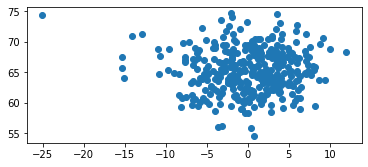

In [8]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)